<span style='font-family:times new roman'><span style='font-size:x-large'>SPA5666 Mid\-term Project</span></span>

## <span style='font-size:x-large'><span style='font-family:times new roman'>Radial Velocity Detection and Characterisation of Extrasolar Planets</span></span>



<span style='font-size:medium'><span style='font-family:times new roman'>Aditya Sudhir Naik</span></span>

<span style='font-size:medium'><span style='font-family:times new roman'>Department of Physics, Queen Mary, university of London, Mile End Road, London, E1 4NS, U.K</span></span>


### _Introduction_

The detection of extrasolar planets is at the centre of modern astronomy and finds its roots all the way back in the days when Johannes Kepler first introduced his three laws of planetary motion. These laws have served as the foundation upon which all astronomers since then have contributed, ultimately creating the technique this report talks about in detail : Radial velocity detection. Using this method has brought great successes to astronomers, leading to not only the detection of more than 250 extrasolar planets but characterising them into specific categories such as Hot Jupiters and Super\-Earths which advances our understanding of the universe greatly.

In this investigation, we will use scientific computing methods to first calculate the orbital anomaly values of the planet, which then leads us to its Cartesian coordinates. Furthermore, we will be using real life data from three stars and fitting a line of best fit to their radial velocity data using a theoretical equation for radial velocity.  All of this will be done using root finding and graph plotting methods such as the Newton\-Rhapson method of root finding and the python library Matplot. Additional libraries such as Numpy and Math will be used for added numerical precision for calculations. These techniques will be explained in detail later in the report with the code.



---



### _Methods_

#### Root finding

One of the first things we must do in this investigation is find the planet's coordinates \(i.e. its position in its orbit as a function of time\). This would be easy for a circular orbit since the radial distance would just be equal to the radius of the orbit, the angular velocity would be constant and the true anomaly $f$ would vary linearly with time. However, like Kepler pointed out, orbits of planets around a host star are elliptical in nature which makes this problem difficult since the angular velocity changes non\-linearly as a function of time.

As mentioned earlier, Johannes Kepler was a pioneer in the field of astronomy and understood this problem hundreds of years ago. To solve this, he created what is now called the Kepler Equation which uniquely relates the eccentric anomaly of an object in orbit \($E$\), to its mean anomaly \($M$\), and the eccentricity of it's orbit \($e$\). This relation is given as follows:

$$
E - e sin(E) = M
$$

Finding the value of the eccentric anomaly $E$ leads to finding the true anomaly $f$ which then leads to the values of the cartesian coordinates of the object in orbit. To solve this equation we need the value of mean anomaly which is defined as follows:

$$
M=\frac{2\pi(t-T_p)}{P}
$$

where $t$ is the time and $T_p$ is the time when the body passed through the pericentre \(or distance closest to the focus\). This value of mean anomaly also depends on the orbital period of the planet \($P$\). Given the values of orbital eccentricity $e$ and the time $t$, we can use the values from the mean anomaly formula and a root finding algorithm to find the value of the eccentric anomaly.

The following code creates two functions, for mean anomaly and eccentric anomaly:



In [1]:
def mean_anomaly(t, tp, P):
    M = (2*math.pi*(t - tp)) / P
    return M

def keplers_eq(E):
    """This equation will be used with the root finding method to find the value of E: Eccentric anomaly"""
    return (E - e*np.sin(E) - M)

Since the Kepler equation has now been defined, we can use a root finding algorithm to find the eccentric anomaly. Here, we will be using a method called the Newton\-Rhapson root finding method. This method uses the function, the first derivative of the same function, and an initial guess to find the roots of the function. It starts with the initial guess, approximates the function using the tangent line, and then finds the x\-intercept values of the tangent. This is an iterative process which means that the initial guess changes with each iteration and once the accuracy is within an arbitrarily defined limit, the root has been found. The following is the numerical formula for this version of the Newton\-Rhapson method: 

$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$

where $x_{n+1} $ is the next term in the iteration, $x_n$ is the current term, $f(x_n)$ is the function, and $f'(x_n)$ is the derivative of the function. The following is the code for performing one step of the Newton\-Rhapson method, and the function defining the derivative of the Kepler equation:


In [2]:
def newton_step(f, fp, x0):
    """Perform one step of the Newton-Raphson algorithm."""
    next_step = x0 - ((f(x0))/(fp(x0)))
    return next_step

def keplers_eq_derivative(E):
    return 1 - e*np.cos(E)

Now that the eccentric anomaly value is ready to be used, we can set up a function to calculate the true anomaly $f$. The following are the expressions used:


$$
\cos f = \frac{\cos E -e}{1-e \cos E} \\
\sin f = \frac{\sqrt{1-e^2} \sin E}{1-e \cos E}
$$




$$
f = \tan^{-1} \left(\frac{\sin f}{\cos f} \right)
$$



The following is the code for the formulae stated above:



In [3]:
def true_anomaly(E):
    """This fucntion calculates the true anomaly but cannot be called immediately since it requires the value of eccentric anomaly which will be found later even though it has been defined above"""
    cos = (math.cos(E) - e) / (1 - e*math.cos(E))
    sin = ((math.sqrt(1-(e**2))) * math.sin(E)) / (1 - e*math.cos(E))

    f = (np.arctan2(sin, cos))
    return f

We can now calculate the radial distance $r$ and use it to calculate the cartesian coordinates:


$$
r = \frac{a(1-e^2)}{1+e\cos f}
$$

$$
x = r\cos f \\
y = r\sin f
$$

The following represents the code for the formulae stated above:



In [4]:
def radial_distance(a):
    """This fucntion calculates the radial distance and takes the value of the semi-major axis as an input"""
    numerator = a*(1-(e**2))
    denominator = 1 + (e*math.cos(true_anomaly(E)))
    r = numerator / denominator

    return r

def cart_coord(a):
    """This function calculates the cartesian coordinates with the help of the semi-major axis and the true anomaly of the orbit"""
    x = []
    y = []
    for i in range(len(true_anomaly_list)):
        x.append((radial_distance(a) * math.cos(true_anom_list(x_list, 0, 20)[i])))
        y.append((radial_distance(a) * math.sin(true_anom_list(x_list, 0, 20)[i])))

    return x, y

#### Graph Plotting

To prove that the methods defined above work, we will now plot the true anomaly of a test data set and see how it changes with respect to time. After that, we will attempt to plot an orbit with the same data and if the method is correct, the shape will be an ellipse.



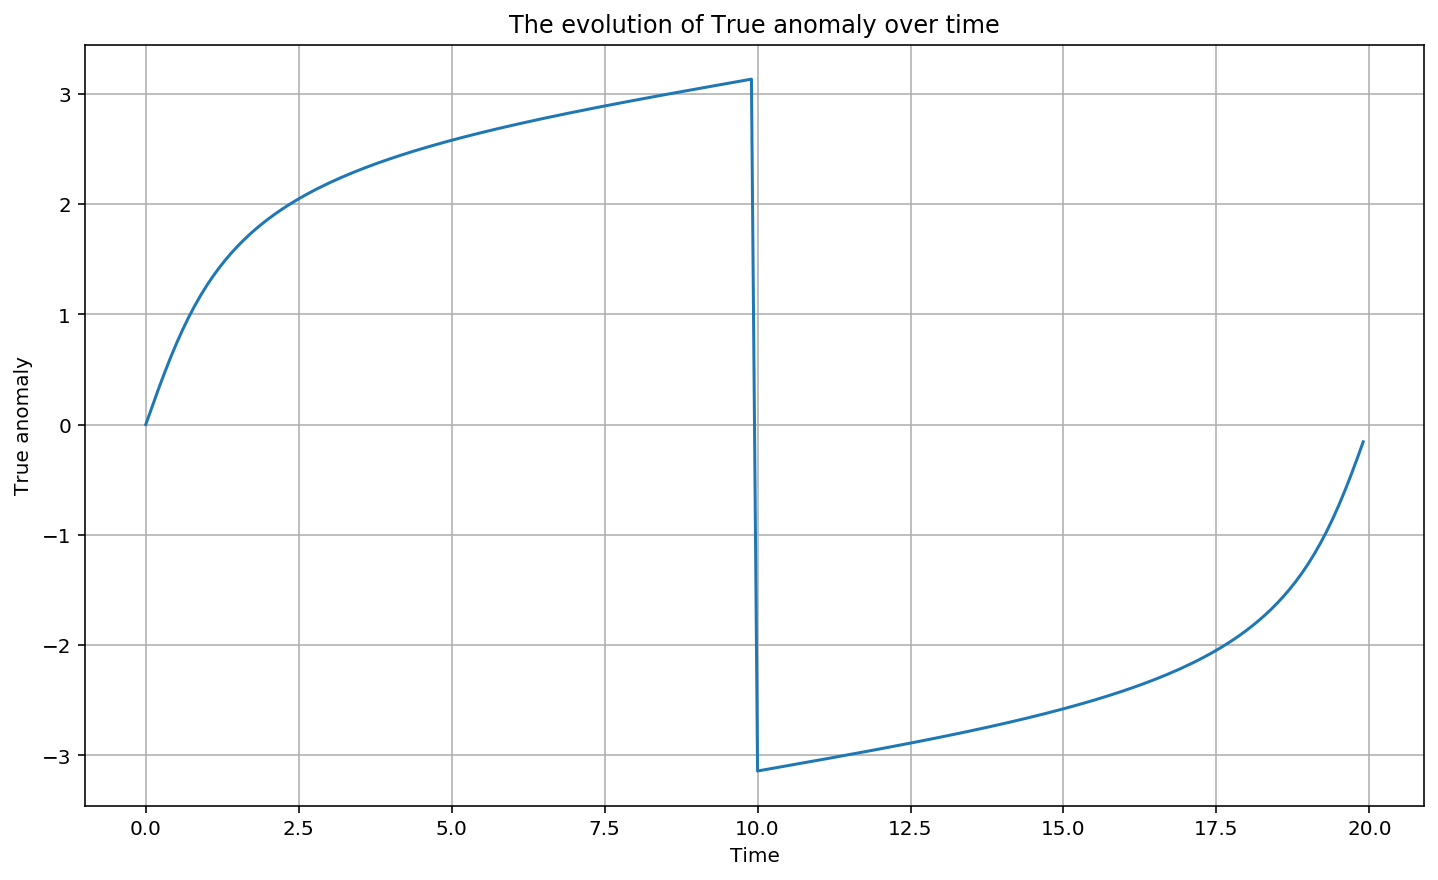

In [5]:
import numpy as np
import math
import matplotlib.pyplot as py

"""The value of eccentricity of the orbit must be changed here. The raw data is in the unit of days but all the formulae require the unit to be seconds so this conversion variable is necessary."""
e = 0.6
converter = 24.*60.*60

mean_anomaly_list = []
eccentric_anomaly_list = []
true_anomaly_list = []

def true_anom_list(t, tp, P):
    """This is the most important function of the code. It gives out the list of true anomalies for each value of time that will be passed to this function (labelled t: this must be a list or an array)"""
    for i in range(0, len(t)):
        global M
        M = mean_anomaly(t[i]*converter, tp*converter, P*converter)
        epsilon = 1e-8
        initial = 1
        counter = 0
        while abs(newton_step(keplers_eq, keplers_eq_derivative, initial) - initial) > epsilon and counter < 35:
            result = newton_step(keplers_eq, keplers_eq_derivative, initial)
            initial = result
            counter += 1
        global E
        E = initial

        mean_anomaly_list.append(M)
        eccentric_anomaly_list.append(E)
        true_anomaly_list.append(true_anomaly(E))

    return true_anomaly_list

#plot time vs true anomaly
x_list = []
for i in range(0,200):
    x_list.append(0.1*i)

py.plot(x_list, true_anom_list(x_list, 0, 20))
py.title("The evolution of True anomaly over time")
py.xlabel("Time")
py.ylabel("True anomaly")
py.grid()

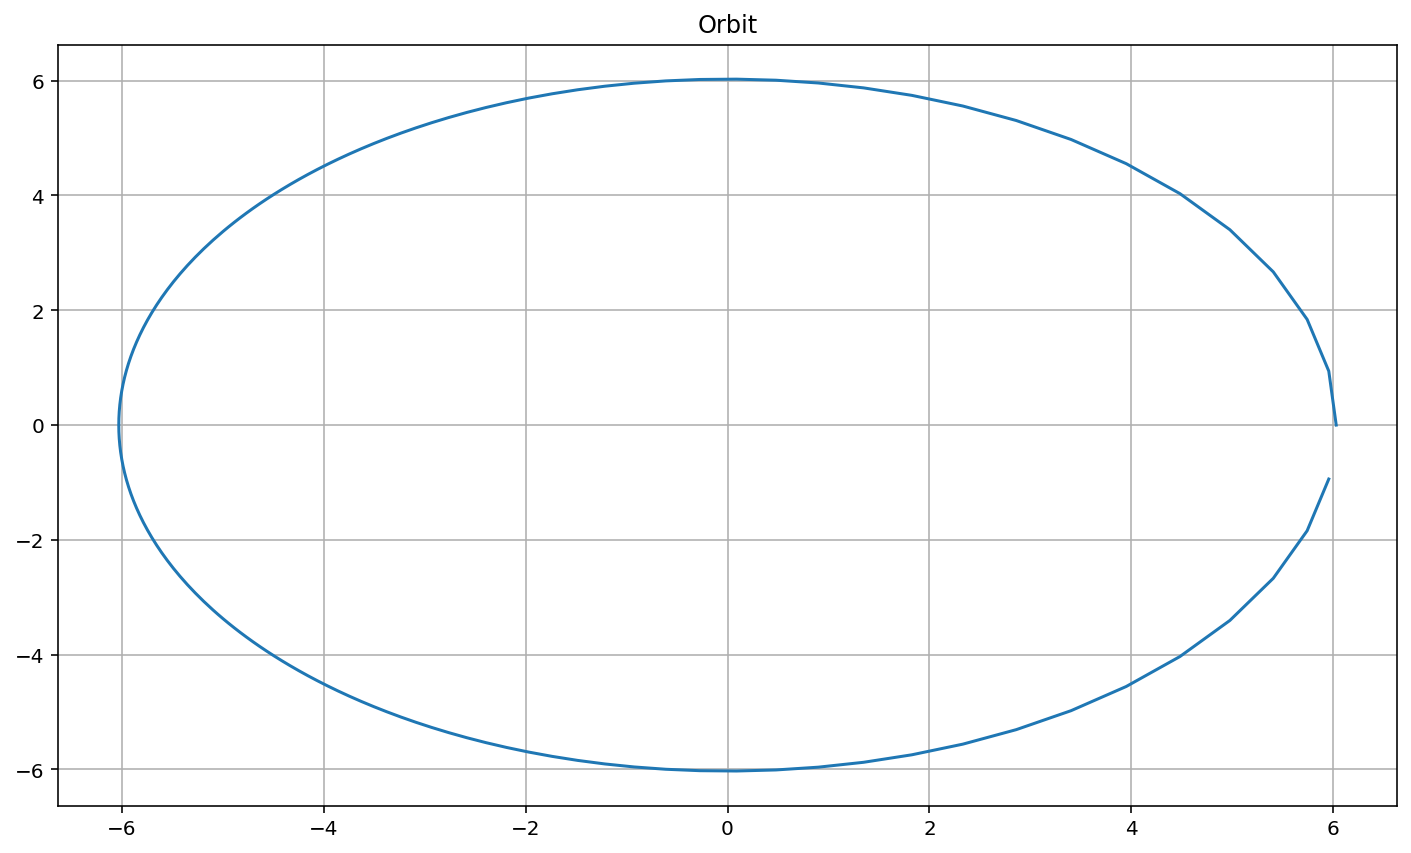

In [6]:
plot_x , plot_y = cart_coord(15)
py.plot(plot_x , plot_y)
py.title("Orbit")
py.grid()

#### Line of best fit

Now we can use these methods on real data sets and extract information from them. For this investigation we will be using the radial velocity data from three stars with mass $M_{*}=1.82 M_{\odot}, M_{*}=1.12 M_{\odot}$ and $M_{*}=0.98 M_{\odot}$ respectively. The theoretical equation for radial velocity $v_r$ we will fit to this data is defined as follows:

$$
v_r = v_o + K \cos(f+\omega) + e \cos(\omega)
$$

where:

- $v_o$ is the average drift speed of the star relative to Earth in metres per second,
- $f$ is the true anomaly
- $K$ is the velocity semi\-amplitude of the orbital motion in metres per second, and
- $e$ is the eccentricity
- $\omega$ is an angle identifying the orientation of the orbital motion

The variables defined above are called fitting parameters and changing these can change the way that the line of best fit looks. To implement this theoretical equation for radial velocity, we will first plot the raw data of the stars' radial velocity as scatter plots. On these graphs, the line of best fit defined by the equation above will be overlayed. The code for this is as follows:



In [7]:
from numpy import loadtxt

"""The following imports the raw data of the stars' radial data. It uses a python library called Numpy and a specific module called loadtxt. The data contains three columns with the time, radial velocity and the uncertainty in this value of radial velocity respectively. These are imported as seperate arrays."""

time_data1, radial_vel_data1, radial_vel_uncertainty1 = loadtxt("star-01.dat", dtype=np.float64, unpack = True)
time_data2, radial_vel_data2, radial_vel_uncertainty2 = loadtxt("star-02.dat", dtype=np.float64, unpack = True)
time_data3, radial_vel_data3, radial_vel_uncertainty3 = loadtxt("star-03.dat", dtype=np.float64, unpack = True)

def radial_vel(t, tp, v0, e, w, K, P):
    """This function takes in t as an array and the rest of the fitting parameters as integers and returns the list of radial velocities that result from the theoretical equation"""
    vr = []
    for i in range(0, len(t)):
        global M
        M = mean_anomaly(t[i] * converter, tp * converter, P * converter)
        epsilon = 1e-8
        initial = 1
        counter = 0
        while abs(newton_step(keplers_eq, keplers_eq_derivative, initial) - initial) > epsilon and counter < 35:
            result = newton_step(keplers_eq, keplers_eq_derivative, initial)
            initial = result
            counter += 1
        E = initial
        vr.append(v0 + K*math.cos(true_anomaly(E)+w) + e*math.cos(w))
    return vr

This is the most important function of the report. It calculates Mean anomaly which is then used to calculate Eccentric anomaly, which is then used to calculate a value for the theoretical radial velocity. This entire process is looped though again and again for the entire length of the time array. You may notice that there are no formulae for the fitting variables. This is because they have to be worked out by looking at the plot of the raw data and guessing the appropriate values, tweaking your guess each time to fit the raw data as closely as possible. An important measure of how closely you have been able to fit your graph is the Chi\-squared function defined mathematically in the following way:

$$
\chi^2 = \frac{1}{N}\sum_{i=1}^N \left( \frac{y_\text{fitted}(x_i) - y_i)}{\sigma_i} \right)^2
$$

The code for the above formula is as follows:



In [8]:
def chi_squared(fit, original, unc):
    numerator = fit - original
    denominator = unc
    result = (1/len(original)) * sum((numerator/denominator)**2)
    return math.sqrt(result)

The value obtained from the above function will determine how good the fit is. This will be done in the results section of this report. Next, we must define the methods we will use to extrapolate data about the planet orbiting the star from the plots we just set up.

#### **Characterising the orbit and mass of the planet**

The orbital period $P$ and stellar mass $(M_*)$ can be used to determine the semi\-major axis $a$ of the orbit using Kepler's third law.

$$
G(M_*+M_p) = a^3 \left( \frac{2\pi}{P} \right)^2
$$

where $G$ is the gravitational constant.
Typically $M_p/M_*\lesssim 10^{-2}$ and can be discarded when other uncertainties are larger than this \(e.g., stellar mass estimate, jitter in radial velocity measurements, stellar pulsations and activity, ...\).

The velocity semi\-amplitude $K$ is a function of masses and orbital properties.

$$
K = \left(\frac{2\pi G}{P} \right)^{1/3}\frac{M_p \sin I}{(M_*+M_p)^{2/3}}\frac{1}{\sqrt{1-e^2}}
$$

where $e$ is the orbital eccentricity and $e=0$ for a circular orbit.  Here $I$ is the inclination of the orbit angular momentum relative to the radial vector joining the star and observer \(e.g., the so\-called _line of sight_ inclination\).  As the radial velocity measured is a projection of the true motion onto the line of sight, only a minimum mass estimate of the mass can be obtained.  For example, when $I=\pi/2$ and the orbit is edge\-on to the Earth.  However, larger values of $I$ lead to smaller radial velocities for the same planet mass $M_p$.  So the radial velocity measurements only determine $M_p\sin I$. Using these formulae, we can define the following code to calculate the semi\-major axis and the value $M_p sinI$: 



In [9]:
def semi_major(ms, P):
    numerator = G * ms
    denominator = ((2*math.pi) / (P*converter))**2
    result = (np.cbrt(numerator/denominator)) / AU2m
    return result

def planet_mass(ms, P, K):
    part1 = np.cbrt((2*math.pi*G) / (P*converter))
    part2 = np.cbrt(ms)**2
    part3 = 1/(math.sqrt(1-(e**2)))
    result = (K * part2) / (part1 * part3)
    return result

---



### _Results_

Since we have defined everything that needed to be defined for us to find the graphs and values we need, we now move on to the results section. Here we will call all the functions we defined in the Methods section systematically and in the end, set up a table with the results.

First, we should plot the line of best fit graphs for all three stars. The following uses the methodology explained above and uses the python library called Matplot to plot the raw data from the files in the form of a scatter plot, and then overlays it with the best fit. As mentioned above, the values of the fitting parameters were guessed to a reasonable accuracy to match the basic shape of the raw data.



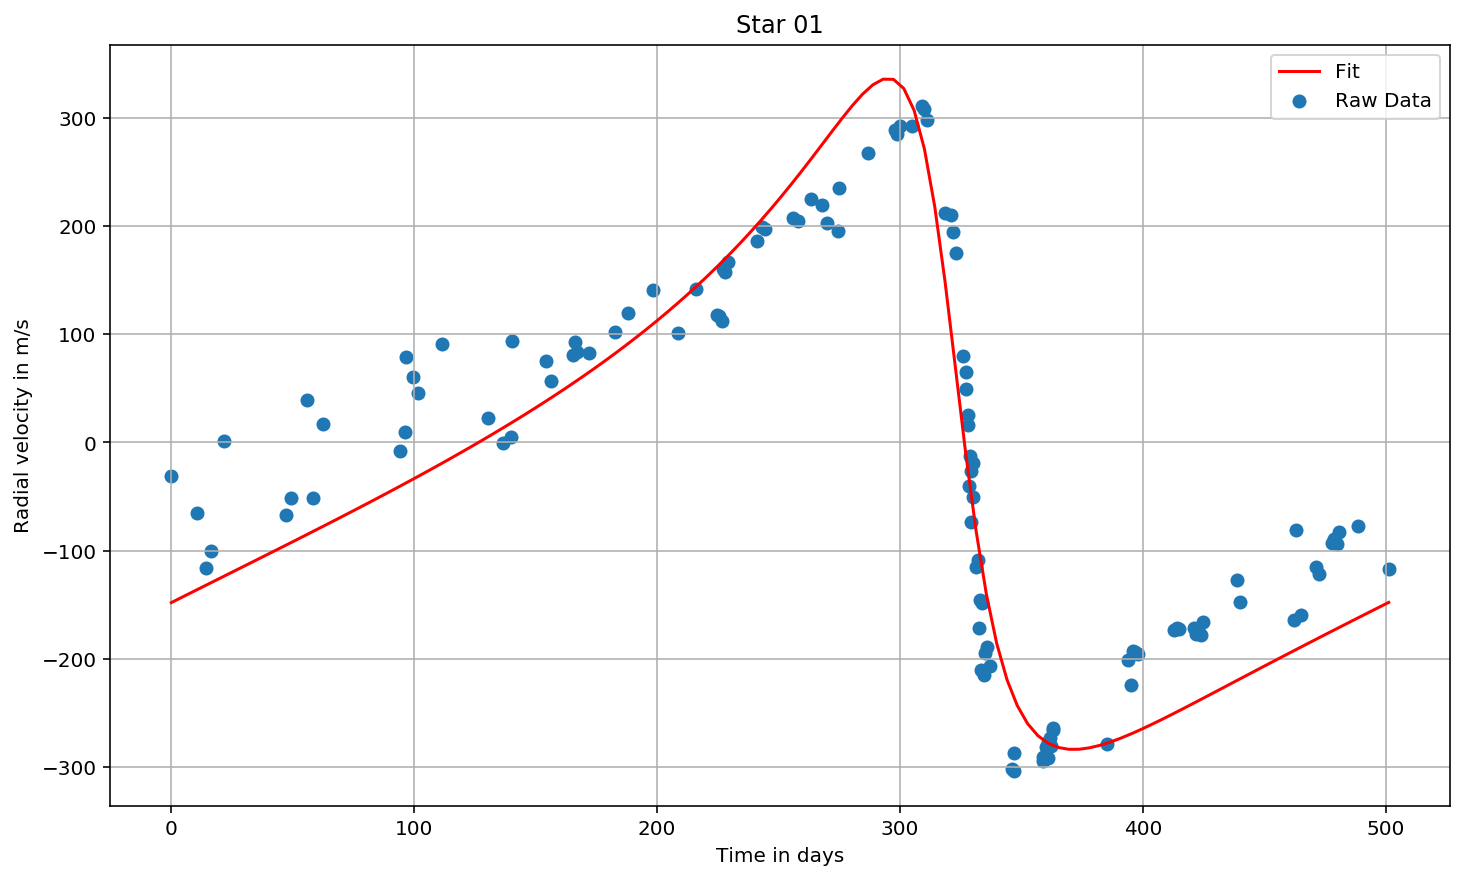

In [10]:
#Code for the first star's plot
t1 = np.linspace(time_data1.min(),time_data1.max(),len(time_data1))
y_data1 = radial_vel(t1, 320, 26, e, 0.4*math.pi, 310, 501)

py.scatter(time_data1, radial_vel_data1, label="Raw Data")
py.plot(t1, y_data1, label="Fit", color="r")
py.title("Star 01")
py.xlabel("Time in days")
py.ylabel("Radial velocity in m/s")
py.grid()
py.legend()
py.show()

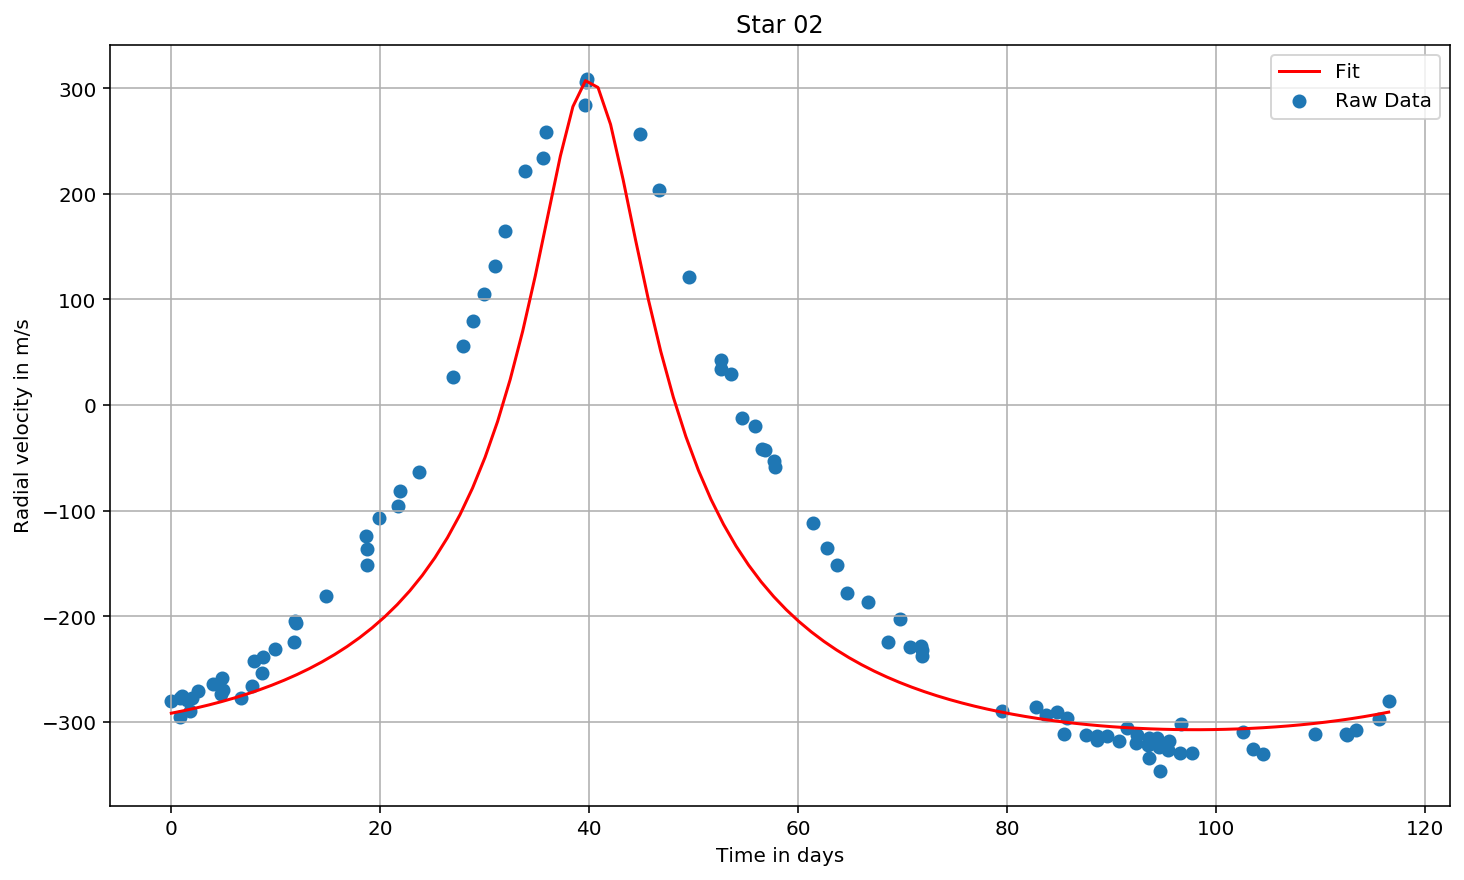

In [11]:
#Code for the second star's plot
t2 = np.linspace(time_data2.min(),time_data2.max(),len(time_data2))
y_data2 = radial_vel(t2, 40, 0, e, 0*math.pi, 308, 116)

py.scatter(time_data2, radial_vel_data2, label="Raw Data")
py.plot(t2, y_data2, label="Fit", color="r")
py.title("Star 02")
py.xlabel("Time in days")
py.ylabel("Radial velocity in m/s")
py.grid()
py.legend()
py.show()

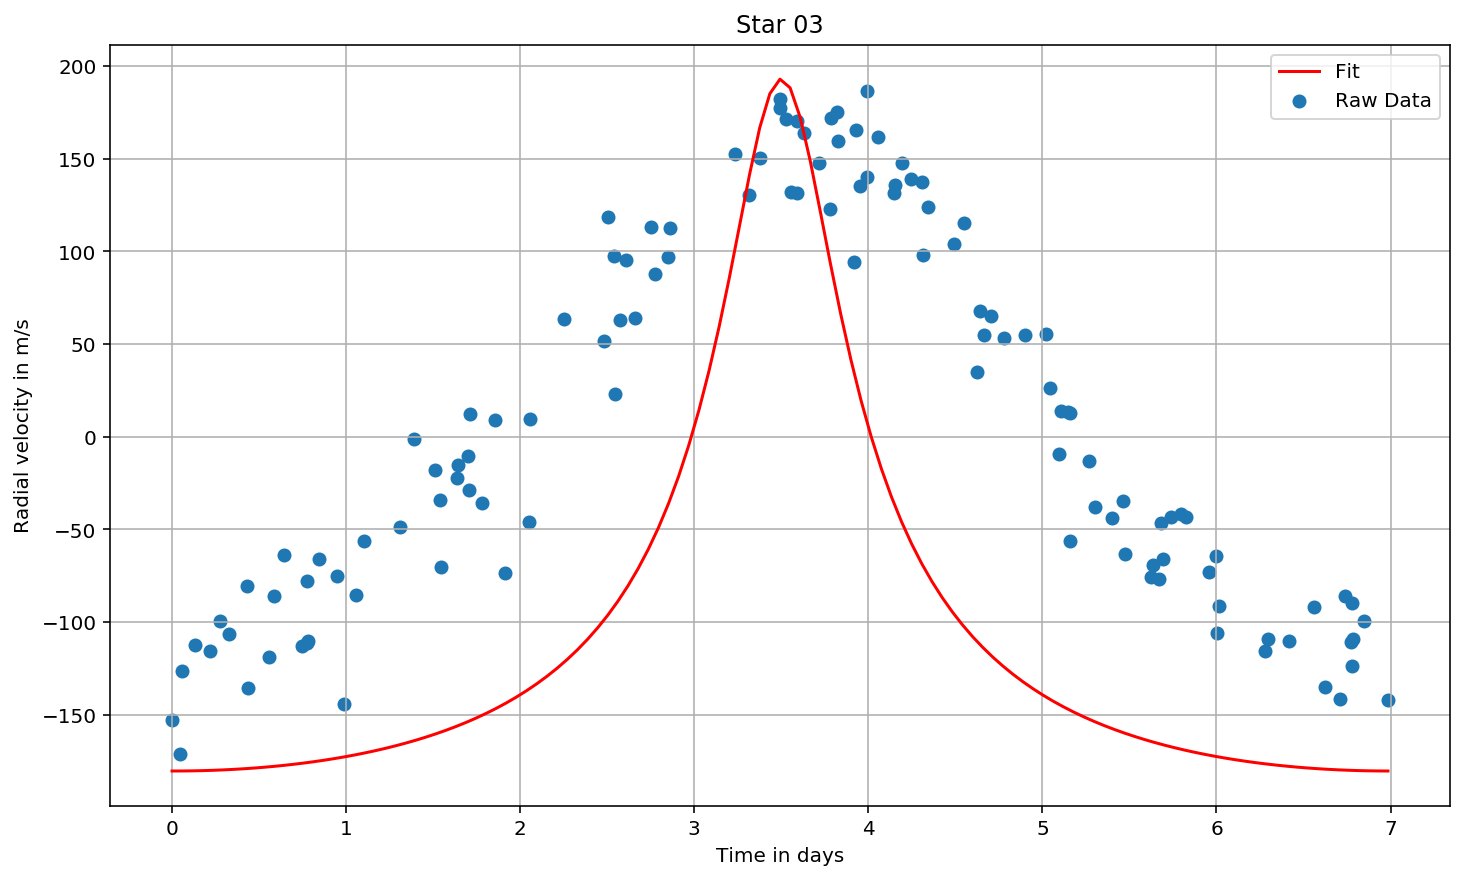

In [12]:
#Code for the third star's plot
t3 = np.linspace(time_data3.min(),time_data3.max(),len(time_data3))
y_data3 = radial_vel(t3, 3.5, 5.7, e, 0*math.pi, 186.7, 6.98)

py.scatter(time_data3, radial_vel_data3, label="Raw Data")
py.plot(t3, y_data3, label="Fit", color="r")
py.title("Star 03")
py.xlabel("Time in days")
py.ylabel("Radial velocity in m/s")
py.grid()
py.legend()
py.show()

Now we must calculate the Chi\-squared values for each of the three graphs to check if the fit is accurate enough. For this, the chi\-squared function defined in the Method section will be used:


In [13]:
print("Chi-squared value for Star 01 = ", chi_squared(np.array(y_data1), radial_vel_data1, radial_vel_uncertainty1))
print("Chi-squared value for Star 02 = ", chi_squared(np.array(y_data2), radial_vel_data2, radial_vel_uncertainty2))
print("Chi-squared value for Star 03 = ", chi_squared(np.array(y_data3), radial_vel_data3, radial_vel_uncertainty3))

Chi-squared value for Star 01 =  44.51705513788195
Chi-squared value for Star 02 =  108.96968500964459
Chi-squared value for Star 03 =  43.44116343213127


These results of the chi\-squared function will be discussed later in the report. For now, we must continue to call all the functions we defined in the Method section. The following code returns the values of the semi\-major axis for all three planets orbiting their respective stars:

\(Before we call the semi\-major axis function, we must define a few constants that are necessary for the following calculation. These constants include, the masses of each of the three stars, the value of the Gravitational constant, the conversion rate of Astronomical Units \(AU\) to metres, and the mass of Jupiter, in whose units the mass of the planets will be calculated later in this report\)


In [14]:
Msun = 1.989e30
Mjupiter = 1.899e27
star01_mass = 1.82 * Msun
star02_mass = 1.12 * Msun
star03_mass = 0.98 * Msun
G = 6.67408e-11
AU2m = 1.495978707E11

print("For the first star's planet, a =", semi_major(star01_mass, 501), "AU")
print("For the second star's planet, a =", semi_major(star02_mass, 116), "AU")
print("For the third star's planet, a =", semi_major(star03_mass, 6.98), "AU")

For the first star's planet, a = 1.5073757156212029 AU
For the second star's planet, a = 0.483448890803156 AU
For the third star's planet, a = 0.07100433670261275 AU


These results for the values of the semi\-major axis will be discussed later in the report. Now, we must calculate the actual masses of the planets orbitting the three stars. The function planet\_mass will be used for this as defined in the Method section of this report:


In [15]:
print("For the first star's planet, M =", (planet_mass(star01_mass, 501, 310) / Mjupiter), "Jupiter masses")
print("For the second star's planet, M =", (planet_mass(star02_mass, 116, 308) / Mjupiter), "Jupiter masses")
print("For the third star's planet, M =", (planet_mass(star03_mass, 6.98, 186.7) / Mjupiter), "Jupiter masses")

For the first star's planet, M = 14.443004973322033 Jupiter masses
For the second star's planet, M = 6.375062218579646 Jupiter masses
For the third star's planet, M = 1.3853171443102674 Jupiter masses


#### Results table

The following table contains all the important results that have been found so far. They will be discussed individually in the next section to assess their strengths and weaknesses.

| File Name | Stellar Mass $(M_*/M_{\odot})$ | $M \sin I (M_\text{Jupiter})$ | Semi\-major Axis \(AU\) | P \(days\) | $e$ |
| :------------ | :----------------------------- | :---------------------------- | :---------------------- | :--------- | :-- |
| `star-01.dat` | 1.82 | 14.44 | 1.507 | 501 | 0.6 |
| `star-02.dat` | 1.12 | 6.38 | 0.483 | 116 | 0.6 |
| `star-03.dat` | 0.98 | 1.39 | 0.071 | 6.98 | 0.6 |



---



### _Discussion_

#### Line of best fit

In all three graphs we can see that the scatter plot represents the raw data and the line plot represents the fitted line that comes from the theoretical equation. We can see in these graphs that the line of best fit is not fitting as accurately as it should to the raw data. This is in part because the fitting parameters were not adjusted as well as they could have been, which would lead to a more closely fitting line. It is also in part, because we are using a generic equation that has not been tailored to be case specific which leads to incoherence between the model and the plot. A way to rid ourselves of all these errors would be to use an external python library which would use modules specifically designed to fit scatter plots such as ours. One example of such a library is Scipy which uses the module Optimize for usecases such as these. Another example is from within the Numpy module itself, called Polyfit. Both of these modules consider the degree of the polynomial that's being graphed and construct a fit by considering each point in the data set.

However, our approach has a few strengths as well, as it allows us to more closely monitor the changes that a single fitting parameter can make. With enough time, one could find the optimum fitting parameters and obtain results that would be comparable to results obtained by the external library modules.

#### Chi\-squared

From the chi\-squared values we can see that the values for star01 and star03 fall under the recommended limit for the chi\_squared function but the value for star02 does not. As mentioned earlier, this could be caused by improper values of the fitting parameters or simply because we are using a static function model to match the raw data that does not follow the theoretical trend as closely as the equation expects.

#### Semi\-major axis

The values obtained for the semi\-major axes of the three planets arond their host stars seem to correct based on the literature values of similar sized star\-planet systems. These values of the semi\-major axis are extremely important since they provide researchers with the exact location of the planet in its orbit around the host star when combined with radial distance as we saw earlier in this report \(re: Root finding section in Method\). In this case, we are using these values of the semi\-major axes to calculate the mass of the planet that is in orbit around this host star. This is an extremely important task since accurate values of planetary masses aid in categorising the planet into a specific category, which is indeed the objective of this investigation. These values of the semi\-major axes also tell us about the orbit and how the planet revolves around the host star. These values can be used to model an accurate orbit of the planet as was seen earlier in this report. An accurate orbital representation is important not only for modeling the star\-planet system, but if humanity decided to travel to this star\-planet system, the exact orbital values could not only save us time, but rocket fuel as well since we would be able to plot the optimum trajectory in which to enter this system. This technique is used everytime we send any sort of spaceship or probe into space.

#### $MsinI$

The values obtained for the $MsinI$ for the three planets orbiting their respective host stars seem to be correct based on the literature of similar sized star\-planet systems. As mentioned before, these values of the $MsinI$ tell astronomers a lot about the planet and cut down the categorisation time by a substantial amount. 

For example: If a planet has mass comparable to that of Jupiter, can straight away put it into one of two categories: Hot Jupiters or Super\-Earths. This saves astronomers a lot of time since they don't have to consider all the possibilities at once. After this, the next step in categorisation would be to look at the emission spectra which would then confirm the planet into one of the two categories since one categories is comprised completely of gas giants and the other contains rocky planets.

Obviously, this value is not just the mass of the planet orbiting around the host star. It also contains the sine of the value sine of inclination of the orbit. This means that unless the value of the inclination of the orbit is known, finding just the value of the planetary mass is not possible.

#### Orbital Period

The values for the orbital period for each planet around the host star were guessed by looking at the scatter plot of the raw data \(radial velocity vs time\). In each case, they were tweaked as suggested to match the raw data more closely. There is no other way to determine the orbital peridod since the other values such as the semi\-major axis and $MsinI$ depend on it for their results. However, since the model matches the raw data pretty closely, it can be surmised that the values chosen for the orbital period were within an acceptable range of uncertainty.

#### Eccentricity

As can be seen in the Results table, the value of eccentricity does not change for any calculations. This was done on purpose since it forms a foundation value like Orbital Period, i.e. all other calculations depend on this value so there was no formula for eccentricity that did not involve a variable that was found using the same eccentricity value. This leads to a circular definition which would be wrong, so the value was kept constant for this entire investigation except when eccentricity was a fitting parameter for radial velocity. It was changed on a trial\-and\-error basis like all other fitting parameters but since there was no noticable change in the range \(0.1 \- 1\), i.e. the chi\-squared value or the line of best fit did not change noticeably, it was kept constant at 0.6. If one wishes to change the value of orbital eccentricity, thereby affecting all calculations in the report, the value defined at the top should be changed.



---



### _Conclusion_

In this investigation, we wanted to fit the theoretical model of radial velocity to the raw data in the form of a line of best fit. This was done by plotting the raw data overlayed with the theoretical model. We also set out to find characteristic values of three extrasolar planets which would help us categorise them. For this purpose, we found the values of the semi\-major axes of three planets around their respective host stars \(1.507 AU, 0.483 AU and 0.047 AU respectively\), and we found their respective masses in units of Jupiter mass \(14.44 $M_p$, 6.38 $M_p$ and 1.39 $M_p$ respectively\). Since, we have completed both tasks, this investigation should be considered a success. 

However, as discussed, there are are various flaws in the investigation that could be mitigated with more time and data. If one wished to improve upon this investigation, one should start with defining a new function for orbital eccentricity since this is the variable that would bring about the most change to the results found in this investigation. As mentioned earlier, more time could also be spent on guessing the right fitting parameters for the theoretical model of radial velocity, or, negate it entirely and focus on one of the alternative methods suggested \(i.e. graph fitting modules from external python libraries such us Scipy and Numpy\).

If this investigation were to be extended, one could categorise the planets to a high degree of precision using spectral analysis. This is a viable further investigation since it would not only categorise the planet, but tell the researcher about its elemental composition and temperature as well, both of which are extremely useful in the field of astronomy. These techniques are used successfully every day by astronomers around the world to discover and study not only exoplanets but asteroids and stars as well.


---



### _References_

Mayor, M. and D. Queloz, 1995, A Jupiter\-mass companion to a solar\-type star, Nature, vol 378, pp.355\-359
https://www.nature.com/articles/378355a0.pdf  

[Murray, C.D., and Correia, A. \(2010\) Keplerian Orbits and Dynamics of Exoplanets. In Exoplanets, eds.edited by S. Seager. Tucson, AZ: University of Arizona Press, 2010, 526 pp. ISBN 978\-0\-8165\-2945\-2.]

[Lovis, C., and Fisher, D., \(2010\) Radial Velocity Techniques for Exoplanets, In Exoplanets, eds.edited by S. Seager. Tucson, AZ: University of Arizona Press, 2010, 526 pp. ISBN 978\-0\-8165\-2945\-2.]

Planetary Sciences, dePater and Lissauer, Cambridge University Press.  Chapter 12 Extrasolar Planets, A basic introduction to exoplanet detection

